<a href="https://colab.research.google.com/github/priyanshu-101/Brain_Tumor/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [5]:
heart_attack_df = pd.read_csv('heart.csv')
heart_attack_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_attack_df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:

heart_attack_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
def hist_box_plot(df, coluna, altura=15, largura=5):
    fig, axes = plt.subplots(1, 2, figsize=(altura, largura))
    sns.histplot(ax=axes[0], data = df[coluna]);
    axes[0].set_title(f'{coluna} Histplot')
    sns.boxplot(ax=axes[1], data = df[coluna]);
    axes[1].set_title(f'{coluna} Boxplot')
    plt.show();

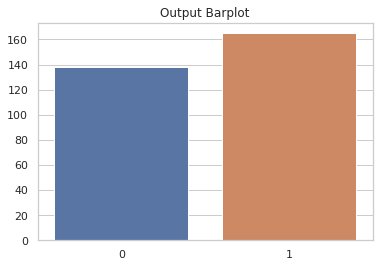

In [9]:
plt.title('Output Barplot')
sns.barplot(x=heart_attack_df['output'].value_counts().index, y=heart_attack_df['output'].value_counts().values);

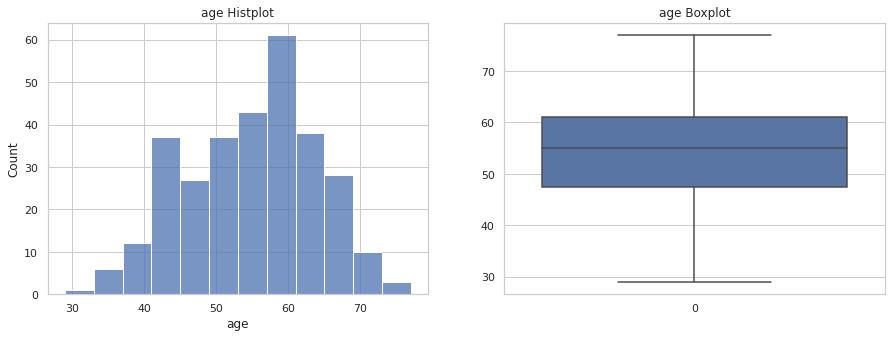

In [10]:
hist_box_plot(heart_attack_df, 'age')

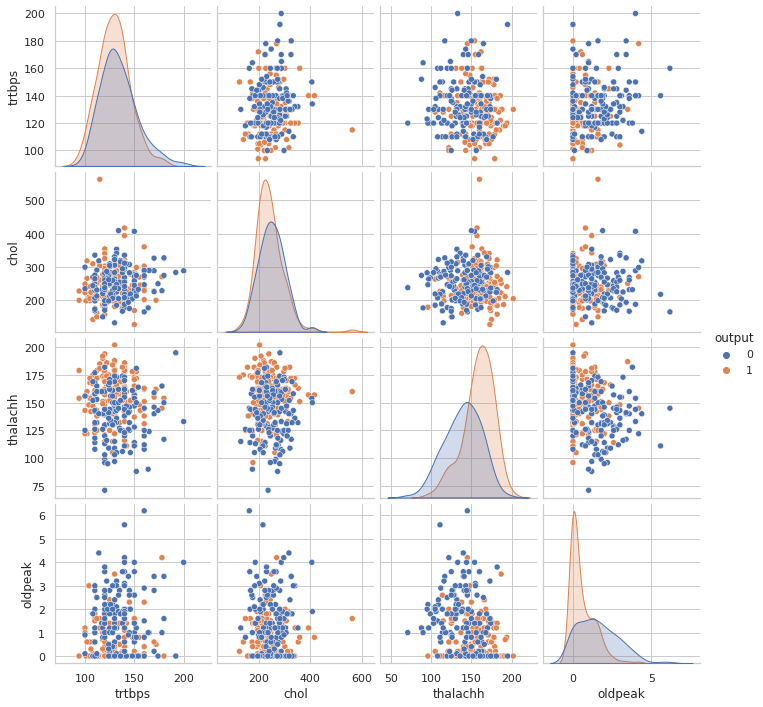

In [11]:
sns.pairplot(heart_attack_df[['trtbps', 'chol', 'thalachh', 'oldpeak', 'output' ]], hue='output');

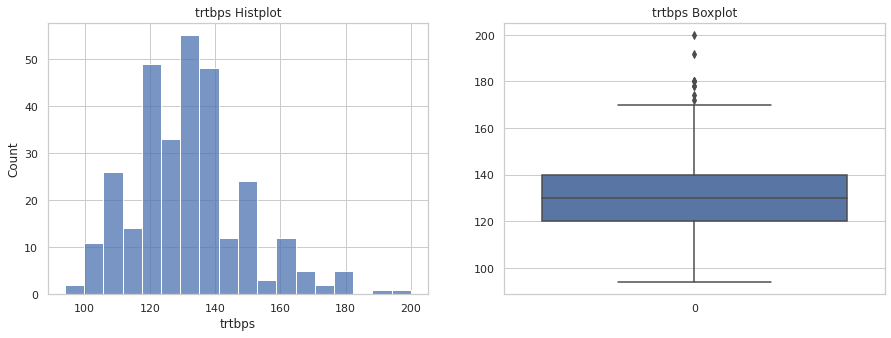

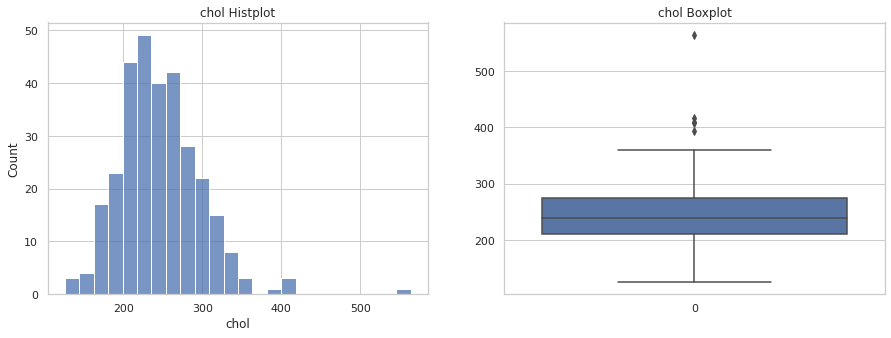

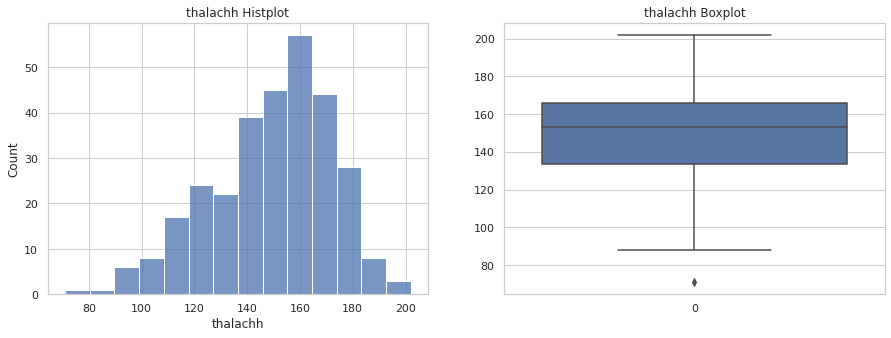

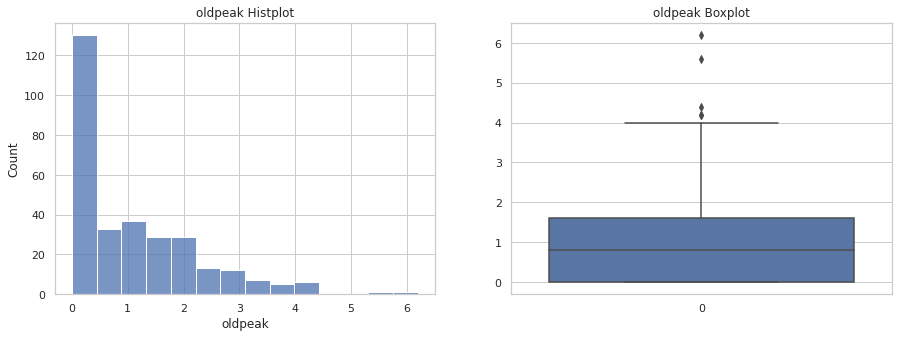

In [12]:
for col in ['trtbps', 'chol', 'thalachh', 'oldpeak']:
    hist_box_plot(heart_attack_df, col)

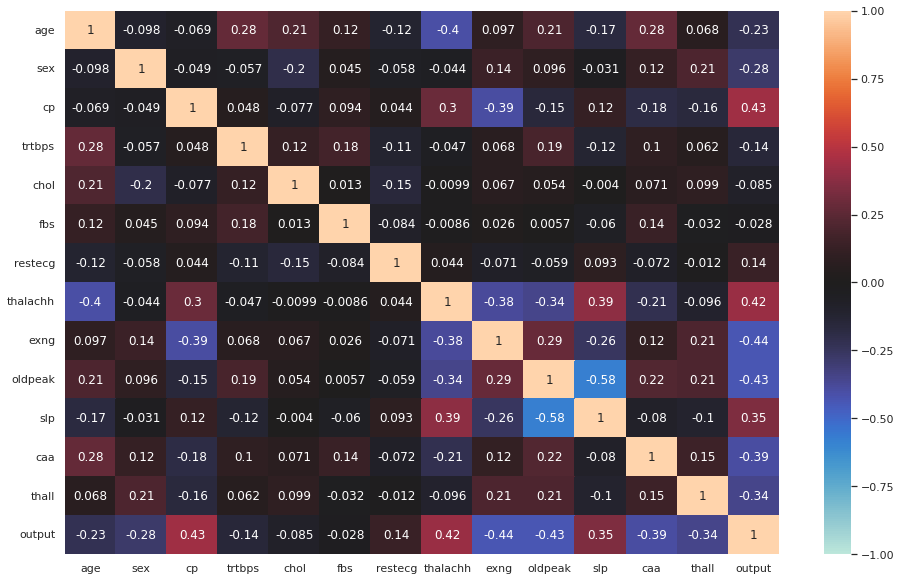

In [13]:
heart_corr = heart_attack_df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(heart_corr, vmin=-1, center=0, vmax=1, annot=True);

In [14]:
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

scaler = StandardScaler()

In [15]:
X = np.array(heart_attack_df.drop('output', axis=1))
y = np.array(heart_attack_df['output'])
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, stratify=y, shuffle=True, random_state=32165498)

print('Train size:', X_train.shape[0])
print('Test size:', X_test.shape[0])


Train size: 236
Test size: 67


In [16]:
# Models
from sklearn.tree         import DecisionTreeClassifier
from sklearn.svm          import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier

# Metrics
from sklearn import metrics

In [17]:
def evaluate_model(y_pred, y_test):
    print('Acc:', metrics.accuracy_score(y_test, y_pred)*100)
    print('F1:', metrics.f1_score(y_test, y_pred)*100)
    print('Recall:', metrics.recall_score(y_test, y_pred)*100)
    print('Precision:', metrics.precision_score(y_test, y_pred)*100)
    print('Matriz de Confusão:\n') 
    sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

Acc: 89.55223880597015
F1: 90.41095890410958
Recall: 91.66666666666666
Precision: 89.1891891891892
Matriz de Confusão:



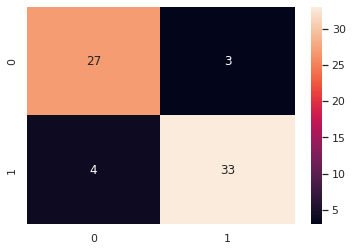

In [18]:
model = SVC(kernel='poly', C=1.8,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model(y_pred, y_test)